In [27]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import required packages for Scaling Numerical input data
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
# import the required package for applying PCA
import sklearn.decomposition
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
# read data from the file and load in to dataframe
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Retrive the number of rows and columns in data frame
df.shape

(7043, 21)

In [5]:
# Retrive the data types of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Retrive the stats of numeric fields
print("Describe Telecom Customer Data")
print(df.describe())

Describe Telecom Customer Data
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [7]:
# Categorical variables stats
print("Summarized Data")
print(df.describe(include=['O']))

Summarized Data
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     0230-UBYPQ   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-

In [8]:
# Checking the count of null values in each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Verify the data if there are any duplicates

dup_df = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(dup_df)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


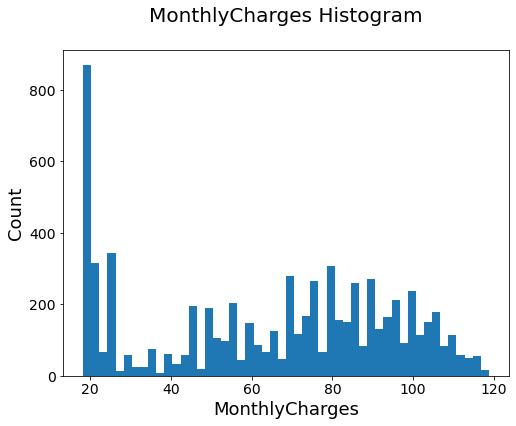

In [8]:
#Plot a histogram on the  MonthlyCharges
ax=df['MonthlyCharges'].plot(kind='hist', bins=50, fontsize=14, figsize=(8,6))
ax.set_title('MonthlyCharges Histogram\n', fontsize=20)
ax.set_ylabel('Count', fontsize=18)
ax.set_xlabel('MonthlyCharges', fontsize=18);
plt.show()

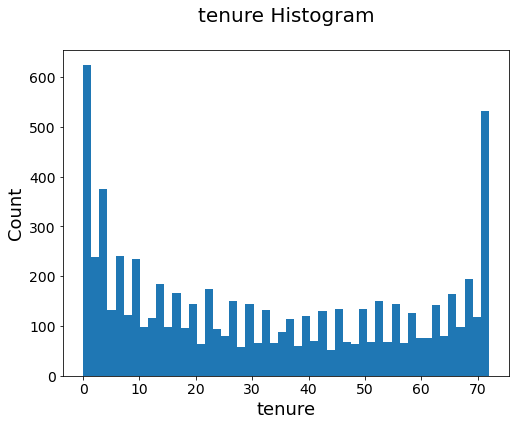

In [9]:
# Plot a histogram on the tenure
ax=df['tenure'].plot(kind='hist', bins=50, fontsize=14, figsize=(8,6))
ax.set_title('tenure Histogram\n', fontsize=20)
ax.set_ylabel('Count', fontsize=18)
ax.set_xlabel('tenure', fontsize=18);
plt.show()

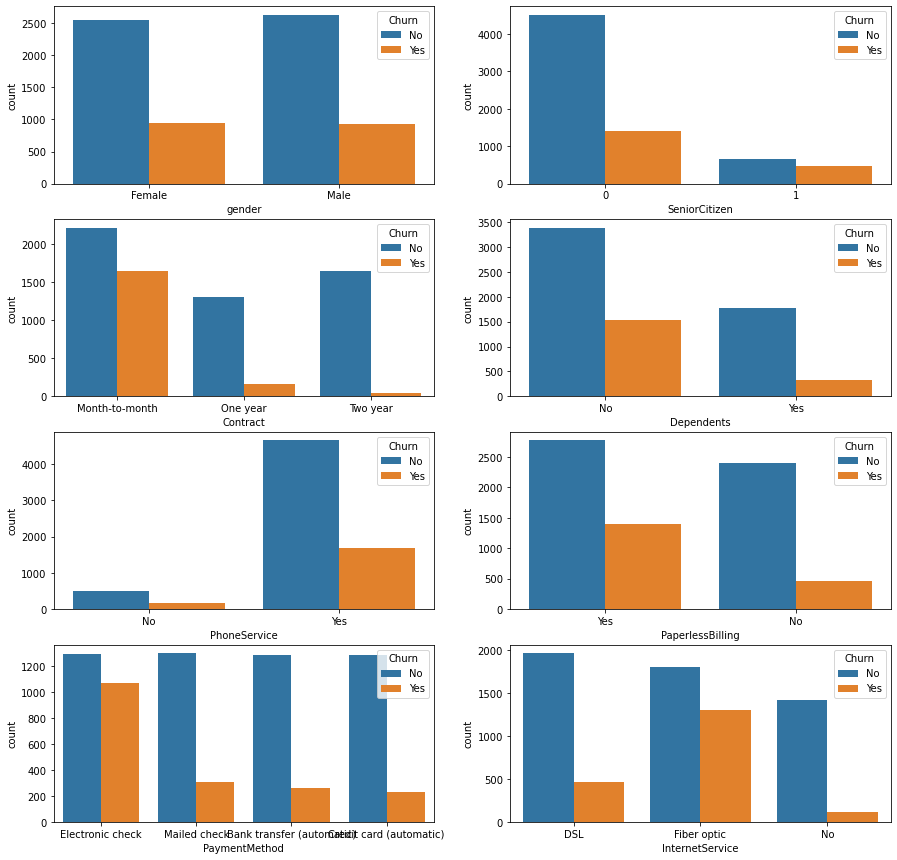

In [10]:
# Plot bar chart on the Categorical variables

plt.figure(figsize=(15, 15))
some_vars = ['gender','SeniorCitizen','Contract','Dependents','PhoneService',
             'PaperlessBilling', 'PaymentMethod', 'InternetService']
i=1
for var in some_vars:
    plt.subplot(4, 2, i)
    sns.countplot(x=var,data=df, hue='Churn')
    i+=1

In [11]:
#Convert Churn variable to numeric
df['Churn'].replace('No', 0,inplace=True)
df['Churn'].replace('Yes', 1,inplace=True)

<AxesSubplot:>

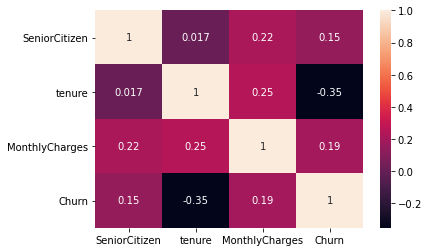

In [12]:
# correlation heatmap on the numerical variables
sns.heatmap(df.corr(), annot = True)

In [13]:
# Splitting the data in to 3 differnt data sets
df_numerical = df[['tenure']]
df_categorical = df[['gender','SeniorCitizen','Contract','Dependents','PhoneService',
             'PaperlessBilling', 'PaymentMethod', 'InternetService']]
df_churn = df[['Churn']]
print('Number of elements in the dataframe ',df.shape)
print('Number of elements in the Input Numerical dataframe ',df_numerical.shape)
print('Number of elements in the Input Categorical dataframe ',df_categorical.shape)
print('Number of elements in the Output Categorical dataframe ',df_churn.shape)

Number of elements in the dataframe  (7043, 21)
Number of elements in the Input Numerical dataframe  (7043, 1)
Number of elements in the Input Categorical dataframe  (7043, 8)
Number of elements in the Output Categorical dataframe  (7043, 1)


In [15]:
# applying MinMax Scaler
scaler=MinMaxScaler()
scaler.fit(df_numerical)

MinMaxScaler()

In [16]:
# Transform Scaled data
df_numerical=scaler.transform(df_numerical)

In [17]:
# Convert the data to DataFrame
df_numerical = pd.DataFrame(df_numerical)
df_numerical.columns = ['tenure']
df_numerical.head()

,tenure
0,0.013889
1,0.472222
2,0.027778
3,0.625000
4,0.027778


In [18]:
# Display the stats of the data after applying MinMax Scaler
print(df_numerical.describe())

            tenure
count  7043.000000
mean      0.449599
std       0.341104
min       0.000000
25%       0.125000
50%       0.402778
75%       0.763889
max       1.000000


In [19]:
# convert the Categorical data to Numerical data
# One Hot Encoding 
df_categorical = pd.get_dummies(df_categorical)
# check the data
df_categorical.head()

,SeniorCitizen,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0
2,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
3,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0


In [20]:
# Concatenate the Numerical and Categorical Data
df_input = pd.concat([df_numerical, df_categorical], axis=1)
df_input.head()

,tenure,SeniorCitizen,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0.013889,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1,0.472222,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0
2,0.027778,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
3,0.625000,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
4,0.027778,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0


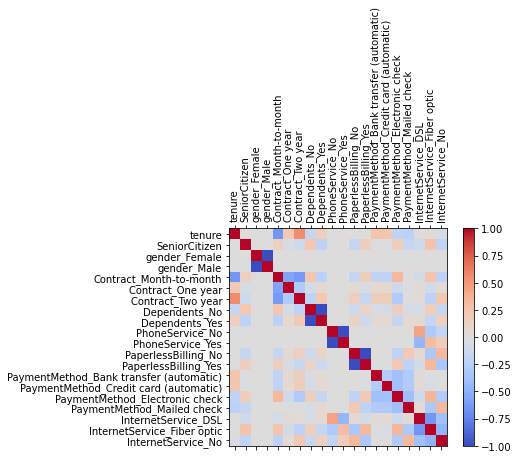

In [21]:
# Plot correlation map to file the corelation between variables

corr = df_input.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_input.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_input.columns)
ax.set_yticklabels(df_input.columns)
plt.show()

In [23]:
# redusing the number of components to 5 using PCA
pca=PCA(n_components=5)
pca.fit(df_input)

PCA(n_components=5)

In [24]:
# Transform the data after applying PCA
df_input_PCA = pca.transform(df_input)

In [25]:
print('Number of elements in the data frame after applying PCA ')
df_input_PCA.shape

Number of elements in the data frame after applying PCA 


(7043, 5)

In [26]:
# Display the input data which is converted to 5 components using PCA
df_input_PCA = pd.DataFrame(df_input_PCA)
df_input_PCA.columns = ['PCA_Component_1','PCA_Component_2','PCA_Component_3','PCA_Component_4','PCA_Component_5']
df_input_PCA.head()

,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5
0,-0.742041,0.624381,-0.588428,1.473460,0.243152
1,0.942647,-0.733343,-0.675357,0.348005,-0.572353
2,-0.310807,-0.762840,-0.528639,0.858478,0.117877
3,0.963369,-0.689557,-0.338968,0.958506,-0.883852
4,-1.346429,0.659860,-0.188579,-0.207400,0.223515


In [28]:
# split data into training and validation and check the details of the datasets
X_train, X_test, y_train, y_test = train_test_split(df_input_PCA, df_churn, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

No. of samples in training set:  4930
No. of samples in validation set: 2113


In [29]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)
target_names = ['Churn_YES', 'Churn_NO']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
#Testing dataset
y_pred_log = log_regression.predict(X_test)
cm_tt_log = confusion_matrix(y_test,y_pred_log)
TP = cm_tt_log[1, 1]
TN = cm_tt_log[0, 0]
FP = cm_tt_log[0, 1]
FN = cm_tt_log[1, 0]

print("Testing Set Confusion Matrix 'LogisticRegression': \n",cm_tt_log)
print("\nTesting Set Classification_Report 'LogisticRegression':")
print(classification_report(y_test,y_pred_log, target_names = target_names))

sensitivity_log_train = TP/(FN+TP)  # TP/(FN+TP)
specificity_log_train = TN/(TN+FP)  # TN/(TN+FP)
print("Test Set Accuracy LR: ",accuracy_score(y_test,y_pred_log))
print("Test Set Sensitivity LR: ",sensitivity_log_train)
print("Test Set Specificity LR: ",specificity_log_train)

Testing Set Confusion Matrix 'LogisticRegression': 
 [[1362  179]
 [ 319  253]]

Testing Set Classification_Report 'LogisticRegression':
              precision    recall  f1-score   support

   Churn_YES       0.81      0.88      0.85      1541
    Churn_NO       0.59      0.44      0.50       572

    accuracy                           0.76      2113
   macro avg       0.70      0.66      0.67      2113
weighted avg       0.75      0.76      0.75      2113

Test Set Accuracy LR:  0.7643161381921438
Test Set Sensitivity LR:  0.4423076923076923
Test Set Specificity LR:  0.8838416612589228


In [31]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(X_train,y_train)

<ipython-input-31-5637c1d559a8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, random_state=1)

In [32]:
#Testing dataset
y_pred_log = model.predict(X_test)
cm_tt_log = confusion_matrix(y_test,y_pred_log)
TP = cm_tt_log[1, 1]
TN = cm_tt_log[0, 0]
FP = cm_tt_log[0, 1]
FN = cm_tt_log[1, 0]

print("Testing Set Confusion Matrix 'RandomForestClassifier': \n",cm_tt_log)
print("\nTesting Set Classification_Report 'RandomForestClassifier':")
print(classification_report(y_test,y_pred_log, target_names = target_names))

sensitivity_log_train = TP/(FN+TP)  # TP/(FN+TP)
specificity_log_train = TN/(TN+FP)  # TN/(TN+FP)
print("Test Set Accuracy LR: ",accuracy_score(y_test,y_pred_log))
print("Test Set Sensitivity LR: ",sensitivity_log_train)
print("Test Set Specificity LR: ",specificity_log_train)

Testing Set Confusion Matrix 'RandomForestClassifier': 
 [[1378  163]
 [ 299  273]]

Testing Set Classification_Report 'RandomForestClassifier':
              precision    recall  f1-score   support

   Churn_YES       0.82      0.89      0.86      1541
    Churn_NO       0.63      0.48      0.54       572

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Test Set Accuracy LR:  0.7813535257927118
Test Set Sensitivity LR:  0.4772727272727273
Test Set Specificity LR:  0.8942245295262816


In [33]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
ada_class = AdaBoostClassifier(n_estimators=1000)
ada_class.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(n_estimators=1000)

In [34]:
# Testing Dataset
y_pred_log = ada_class.predict(X_test)
cm_tt_log = confusion_matrix(y_test,y_pred_log)
TP = cm_tt_log[1, 1]
TN = cm_tt_log[0, 0]
FP = cm_tt_log[0, 1]
FN = cm_tt_log[1, 0]

print("Testing Set Confusion Matrix 'AdaBoostClassifier': \n",cm_tt_log)
print("\nTesting Set Classification_Report 'AdaBoostClassifier':")
print(classification_report(y_test,y_pred_log, target_names = target_names))

sensitivity_log_train = TP/(FN+TP)  # TP/(FN+TP)
specificity_log_train = TN/(TN+FP)  # TN/(TN+FP)
print("Test Set Accuracy AB: ",accuracy_score(y_test,y_pred_log))
print("Test Set Sensitivity AB: ",sensitivity_log_train)
print("Test Set Specificity AB: ",specificity_log_train)


Testing Set Confusion Matrix 'AdaBoostClassifier': 
 [[1356  185]
 [ 285  287]]

Testing Set Classification_Report 'AdaBoostClassifier':
              precision    recall  f1-score   support

   Churn_YES       0.83      0.88      0.85      1541
    Churn_NO       0.61      0.50      0.55       572

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Test Set Accuracy AB:  0.7775674396592522
Test Set Sensitivity AB:  0.5017482517482518
Test Set Specificity AB:  0.8799480856586632


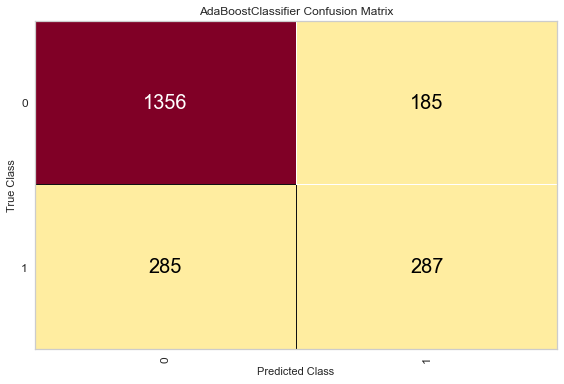

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [35]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(ada_class, target_names=target_names, percent=False)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

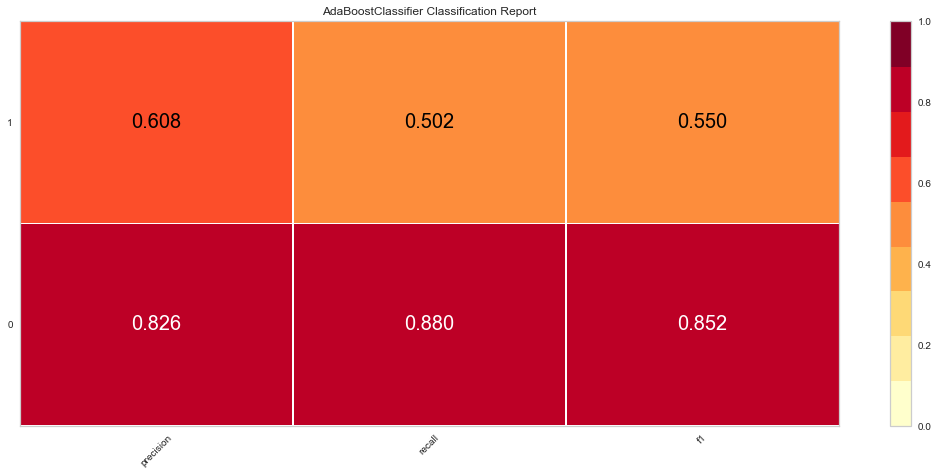

In [36]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(ada_class, target_names=target_names)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

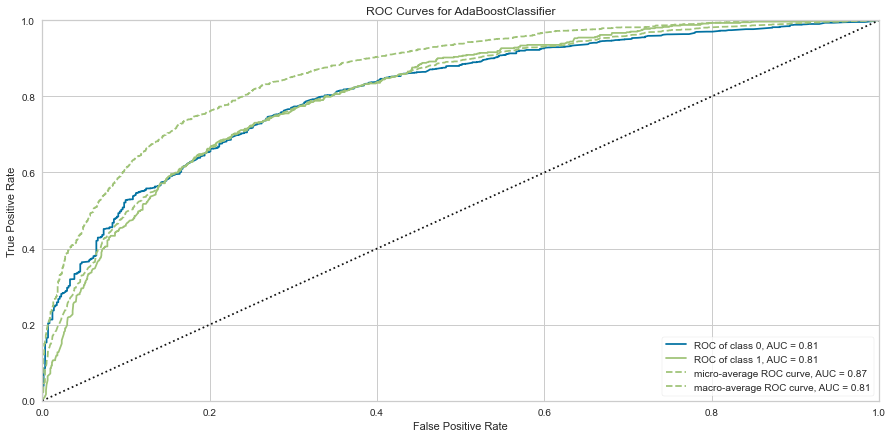

In [37]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(ada_class)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()